<a href="https://colab.research.google.com/github/Mahi200728/DataScience-A2/blob/main/Javi_MahiUnit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

For this project I decided to analyze the penguins data. Specifically how different factors can affect the penguins overall body_mass. The main variable I focused on was flipper length, bill length, and bill depth. I also took a glance at sex, species, and island but didn't focus much on them (I explain it below).

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [ ]:
penguin = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/penguins.csv')


In [ ]:
print(penguin)

       species     island  bill_length  bill_depth  flipper_length  body_mass  \
0       Adelie  Torgersen         3.91        1.87            18.1      3.750   
1       Adelie  Torgersen         3.95        1.74            18.6      3.800   
2       Adelie  Torgersen         4.03        1.80            19.5      3.250   
3       Adelie  Torgersen          NaN         NaN             NaN        NaN   
4       Adelie  Torgersen         3.67        1.93            19.3      3.450   
..         ...        ...          ...         ...             ...        ...   
339  Chinstrap      Dream         5.58        1.98            20.7      4.000   
340  Chinstrap      Dream         4.35        1.81            20.2      3.400   
341  Chinstrap      Dream         4.96        1.82            19.3      3.775   
342  Chinstrap      Dream         5.08        1.90            21.0      4.100   
343  Chinstrap      Dream         5.02        1.87            19.8      3.775   

        sex  year  
0      

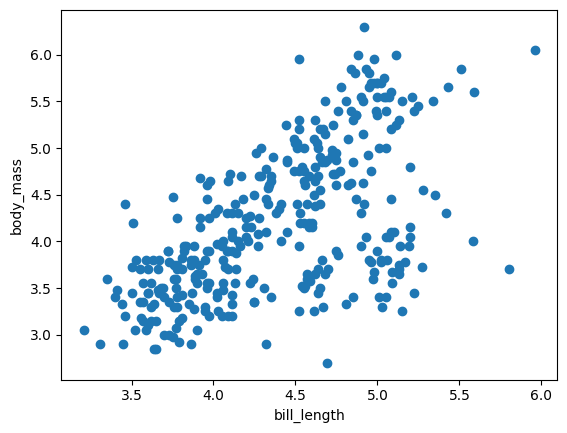

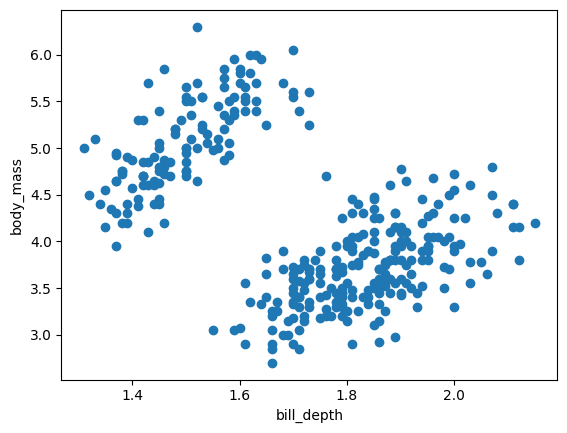

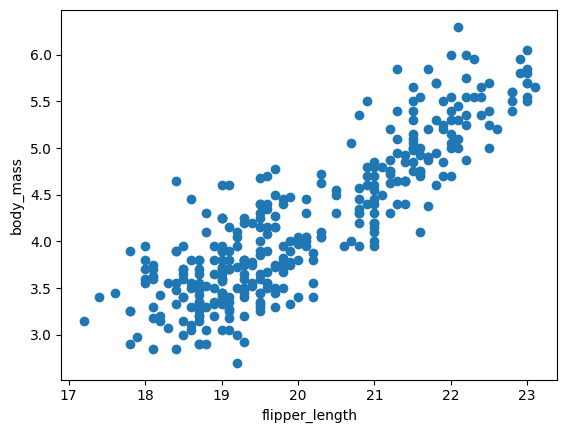

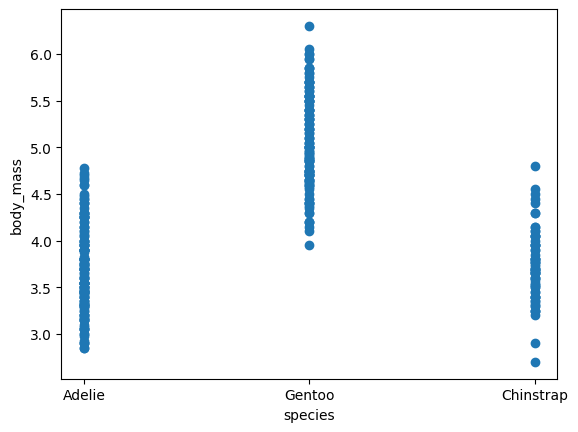

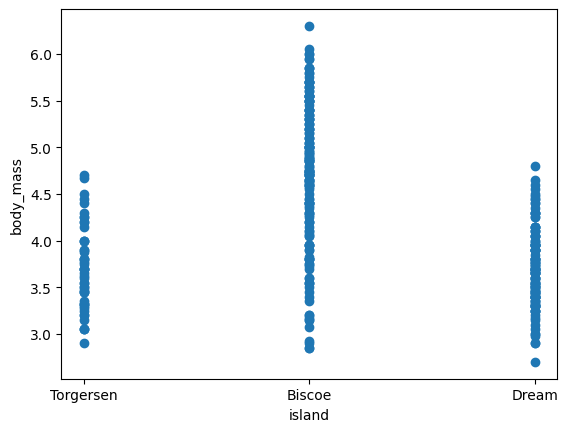

In [ ]:
x = ["bill_length", "bill_depth", "flipper_length", "species", "island"]
y = "body_mass"
for a in x:
  plt.scatter(penguin[a], penguin[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

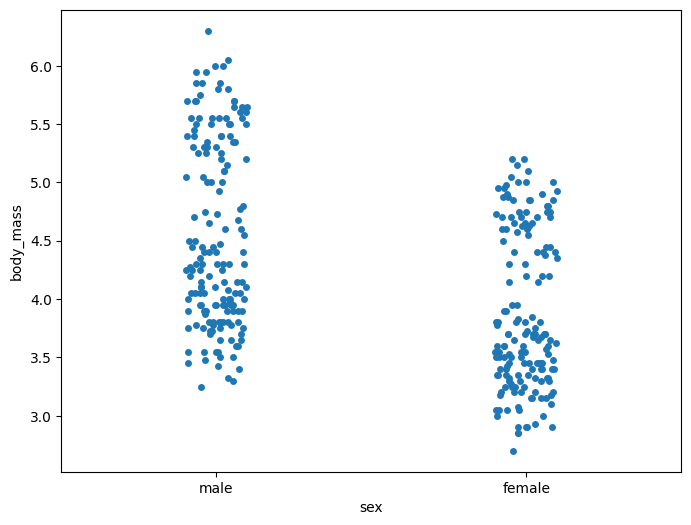

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

x = "sex"
y = "body_mass"

# Create a scatter plot with jitter
plt.figure(figsize=(8, 6))
sns.stripplot(x=x, y=y, data=penguin, jitter=True, dodge=True)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

I started off by graphing my data points for each varaible verses how they affected the body_mass. Starting off I graphed bill length which had a decent positive correlation but the data points were very spread out and just by looking at it we can tell the correlation isn't very strong. Then I graphed bill depth which had two seperate sections of data points both of which were postive but the correlation when looked at (the r-value) is very weak. I attributed this descrepency to natural eveolution where one species probably developed deeper beaks to better catch their prey, but that being said I don't think it really will end up affecting the overall body mass so I don't think I am going to use it that much. The third plot I graphed was the best one out of all of them and it was the graph between flipper length and body mass. This graph was very linearized and condensed meaning the correlation must have been high which is really good for my analysis (i mainly used this one later on). Finally I graphed species, island, and sex. For species and island I got three very thin lines where Adelie and Chinstrap seem pretty similar and their correlating islands also do as well. The range for Gentoo and its correlating island is a bit higher and bigger but still was very linear. I had to grpah sex seperately (got the code framework from a online source but I forgot to copy it and now its lost into the abyss) using seahorse (i'm not really sure why but I think it had to do with the fact that it was a float variable and it also had stuff like NaN, which means the researchers didn't get that data, which the code had to filter out). For the sex, species, and island vairbales I didn't focus much on them because I though biological varibles meant a bit more than species or sex would. What I mean by that is like for example, on average people of different biological genders have similar features like a females are typically shorter but there are always outliers or people who don't fit into that grouping so I thought the same would be true here. I think by focusing on the biological data more I will be able to analyze the data better and we would be much easier to understand correlations or causations for each biological part and how that affects the overall body mass.

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
import bambi as bmb

In [ ]:
#linear regression model
penguin = penguin.dropna(subset=['body_mass'])
with pm.Model() as model_linear:
    # Priors for the linear part of the model
    α = pm.Normal("α", mu=0, sigma=10)  # Intercept
    β = pm.Normal("β", mu=0, sigma=10)  # Slope for flipper_length

    # Linear equation
    μ = pm.Deterministic("μ", α + β * penguin.flipper_length)

    # Prior for the standard deviation of the error
    σ = pm.HalfNormal("σ", sigma=10)

    # Likelihood (using Normal distribution for linear regression)
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=penguin.body_mass)

    idata_linear = pm.sample(idata_kwargs={"log_likelihood": True})

Output()

Output()

I decided to do a linear regression model because it is better suited to handle continuous variables like body mass. It is also really simple so it was a good launching point for me to start off with my analysis. I also had to add the first line of code here because just like with sex above, some of the data had miscelanious values like NaN which messed up the analysis so to get a better understanding I got rid of those data points.

In [ ]:
pm.sample_posterior_predictive(idata_linear, model = model_linear, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
#multiple linear
with pm.Model() as model_mlb:

    #priors on the linear part of the model
    α = pm.Normal("α", mu=0, sigma=1)
    β0 = pm.Normal("β0", mu=0, sigma=10)
    β1 = pm.Normal("β1", mu=0, sigma=10)

    #linear aspect
    μ = pm.Deterministic("μ", pm.math.exp(α + β0 * penguin.flipper_length + β1 * penguin.bill_length))

    #prior --> standard deviation
    σ = pm.HalfNormal("σ", 10)
    #likelihood
    y = pm.NegativeBinomial("y", mu=μ, alpha=σ, observed=penguin.body_mass)
    idata_mlb = pm.sample(idata_kwargs={"log_likelihood":True})

Output()

Output()

I also did a multiple linear model mainly for a few reasons. The first being that it again is better suited for continous data which body mass definetly is. It also assumes linearity which we know is true because of the scatter plots above. This is also why I chose flipper length and bill length as my variables rather than bill depth because they were more lineralized than the latter mentioned variable.

In [ ]:
pm.sample_posterior_predictive(idata_mlb, model = model_mlb, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
az.loo(idata_mlb)

,0
elpd_loo,-568.014537
se,2.213956
p_loo,0.159305
n_samples,2000
n_data_points,342
warning,False
loo_i,[<xarray.DataArray 'loo_i' ()> Size: 8B\narray...
pareto_k,[<xarray.DataArray 'pareto_shape' ()> Size: 8B...
scale,log
good_k,0.697064


In [ ]:
cmp_df = az.compare( {"multi_lin":idata_mlb,"lin_regress":idata_linear} )
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
lin_regress,0,-169.079429,3.005107,0.000000,1.0,13.127460,0.000000,False,log
multi_lin,1,-568.014537,0.159305,398.935108,0.0,2.213956,12.835175,False,log


Since the elpd_loo value is negative and so low we know that it might not have the highest predictive accuracy which isn't the best when it comes to analyzing and using this model to predict other penguins body mass. The p_loo value helps us understand the complexity of the our model so we can tell that the multiple linear regression isn't very complex while the linear regression model is much more complex. The elpd_diff value helps us see which model is going to work the best (multiple linear regression model). The se helps us see the standard error and which one is ore uncertain than the other.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

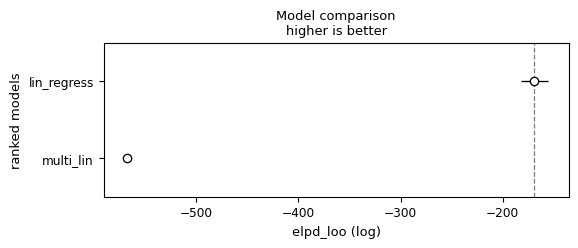

In [ ]:
az.plot_compare(cmp_df)

The linear regression model is the better performing model which we can tell because it is the one closer to 0.

In [ ]:
!pip install bambi

In [ ]:
penguin = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/penguins.csv')


In [ ]:
penguin = penguin.dropna(subset=['body_mass', 'bill_length', 'flipper_length'])
model_penguin = bmb.Model("`body_mass` ~ `bill_length` + `flipper_length`", data=penguin)
idata_penguin= model_penguin.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:02

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["bill_length",  "bill_depth"], fig_kwargs={"figsize":(11, 4)})

NameError: name 'data_penguin' is not defined

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["bill_length",  "species"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["flipper_length",  "bill_depth"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["flipper_length",  "species"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["bill_length",  "island"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
bmb.interpret.plot_predictions(model_penguin,
                               idata_penguin,
                                ["flipper_length",  "island"], fig_kwargs={"figsize":(11, 4)})

The bill length and body mass graph without conditioning shows us that there is a wider interval which means that there is a bigger amount of uncertainty and it gives a weaker relationship. But the bill length and body mass grpah that is conditioned by species or island is a bit more clear and it shows us the species or island specific trends. This is really important because it can help us see if there are enviormental factors (type of food that is availabe, predators that might hunt them, or just what makes them more aerodynamic when swimming) that might be affecting the relationship. The grpahs that involve bill depth as a predictor has a wider interval which goes back to my earlier prediction that the bill depth probably doesn't have a huge impact on body mass compared to the other factors. Finally the graphs that compare flipper length and body mass are very clearly linear and the graphs are much more steeper which means that they probably have a higher impact than any of the other factors, which comforms what I said in reference to the scatter plots.

In [ ]:
model_pen_interq = bmb.Model("`body_mass` ~ `flipper_length` + `bill_length` + `flipper_length` *`bill_length`", data=penguin)
#the model
idata_pen_interq = model_pen_interq.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
bmb.interpret.plot_predictions(model_pen_interq,
                               idata_pen_interq,
                               ["flipper_length","bill_length"],
                               fig_kwargs={"figsize":(11, 13)})#,

plt.ylim(0)  # Set the minimum limit --> 0

plt.show()

Based on the graphs above I decided to graph flipper length vs body mass with bill length as a predictor. This graph has a positive relationship which means as flipper length or bill length increases the overall body mass increases which is what i predicted based on the scatter plots. The lines are also not parallel which means that one predictor might depend on the other one which helps back up the claim that they both affect the bpdy mass, it also helps us understand that one predictor might correlate with the other rather than them being seperate. Based on this graph we can tell that flipper length has a bigger impact on body mass compared to bill length whcih we can tell by the steepness of both lines (flipper ones are steeper than bill ones). This graph also shows that there is a certain level of uncertanty but also at certain points we can clearly assume that a certain flipper length will correlate with a certian body mass (the wideness of the plot at teh beginning and the end but the very lineralized center).

## Conclusion

Based on all of the models I created I was able to see how each varaible affected the overall body mass as well as see which ones affected it more or less. Based on the scatter plots and the models above we can pretty confidently say that flipper length is a huge factor that can help us predict bpdy mass. All of teh graphs that include it had very consise postive linear relationships which helps us know that the predictor is pretty accurate when it comes to predicting the body mass. Bill length also a decent predictor but I think it corrleated with the species and island more, most likely do to basic eveolutionary factors (eating, escpaing preditors, and other stuff). While flipper length probably was also affected by evolution I think bill length had more to do with their immediate surroundings and survival than flipper length could every have. Things like the different bugs, fishes, or berrys each island posses is more nuanced than just swimming could ever be so I think in the grand biological scheme of things it was more afffected by evolution than flipper length could have ever been. Bill depth really didn't have much a predicting role and I don't really know the biological reasoning as to why but I am assuming it is very similar to the bill length reaosning. Overall this analysis helps us better understand penguins and the way their body mass works. It also helps us gain a deeper insight into the affects of evolution and how that pans out into something we interact with fairly often. Also like always we never really have the full picture with data so there could have been other external factors like famine or something else that could have affected teh body mass without us knowing. I also think other more complex models could also pick up on nuances that I wasn't able but I think overall flipper length and teh models I picked did a good job at helping us understand and predict the penguins body mass.